<a href="https://colab.research.google.com/github/vasilisamilosevic/MasterRadPreventiveMaintence/blob/main/CreatingDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks

In [14]:
def stft(sig, frameSize, overlapFac=0, window=np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))

    # zeros at beginning (thus center of 1st window should be for sample nr. 0)   
    samples = np.append(np.zeros(int(np.floor(frameSize/2.0))), sig)    
    # cols for windowing
    cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))

    frames = stride_tricks.as_strided(samples, shape=(int(cols), frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
    frames *= win
    
    fftResults = np.fft.rfft(frames)
    windowCorrection = 1/(np.sum(np.hanning(frameSize))/frameSize) #This is amplitude correct (1/mean(window)). Energy correction is 1/rms(window)
    FFTcorrection = 2/frameSize
    scaledFftResults = fftResults*windowCorrection*FFTcorrection

    return scaledFftResults

In [15]:

sample_rate, samples = wav.read('/content/drive/MyDrive/Signali/24. 25.02.2021/jedan_kanal_2min_TA_PV_M1_25_02_2021-10g.wav')

stftr=stft(samples, 10)



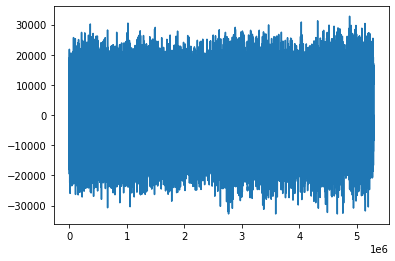

In [16]:
plt.plot(samples)

In [7]:
import librosa

In [8]:
y, sr = librosa.load('/content/drive/MyDrive/Signali/24. 25.02.2021/jedan_kanal_2min_TA_PV_M1_25_02_2021-10g.wav')

In [9]:
y

array([-0.05165837, -0.07199448, -0.06869866, ...,  0.28752702,
        0.31456208,  0.33913597], dtype=float32)

In [10]:
sr

22050

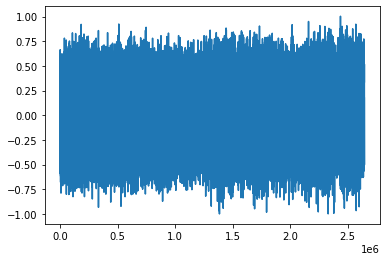

In [17]:
plt.plot(y)

In [3]:
import tensorflow as tf

In [18]:
signal= tf.convert_to_tensor(y)

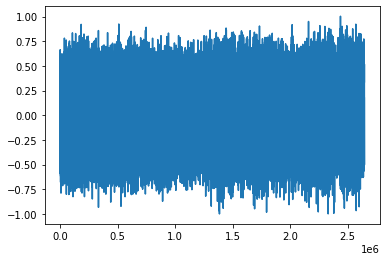

In [19]:
plt.plot(signal)

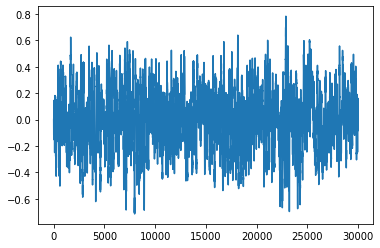

In [44]:
plt.plot(tf.slice(signal, begin=[15000], size=[30000]))

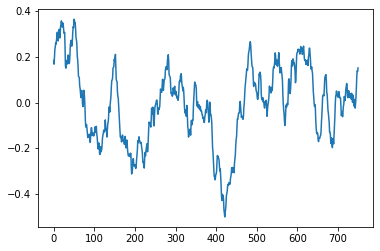

In [36]:
plt.plot(tf.slice(signal, begin=[750], size=[750]))

In [46]:
header = 'samples, class'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

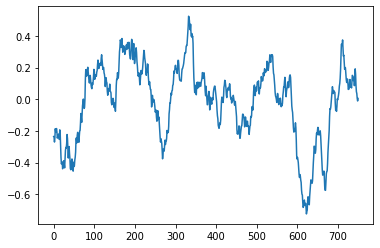